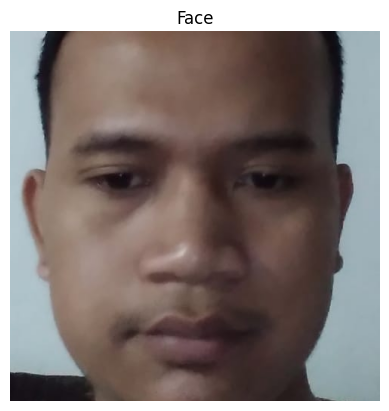

In [2]:
import cv2
import matplotlib.pyplot as plt

def load_image(file_path):
    return cv2.imread(file_path)

def extract_face(image):
    # Load the pre-trained Haar Cascade face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    if len(faces) > 0:
        # Assume the largest face in the image is the face of interest
        largest_face = max(faces, key=lambda rect: rect[2] * rect[3])
        x, y, w, h = largest_face
        face = image[y:y+h, x:x+w]
        return face
    else:
        return None

# Example usage
image_path = "data/data_1/photo_1.jpg"
image = load_image(image_path)
cropped_face = extract_face(image)

if cropped_face is not None:
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Face')
    plt.show()
else:
    print("No face found in the image.")


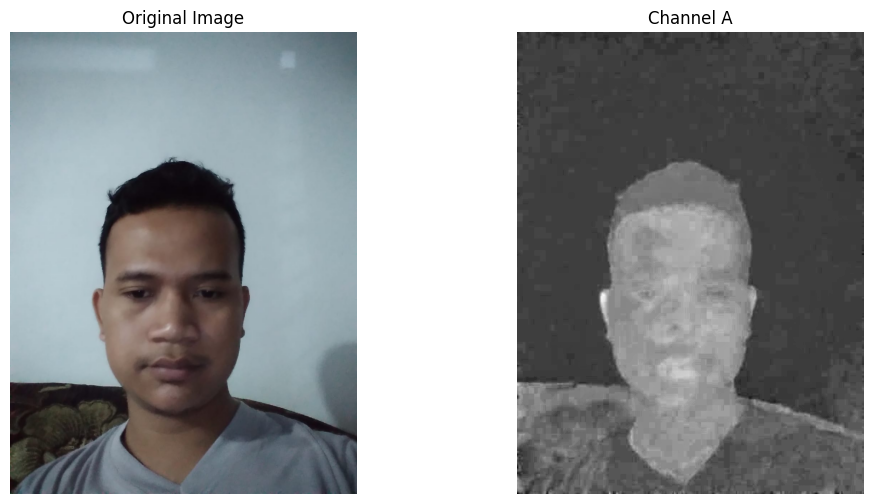

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab

def load_image(image_path):
    img = Image.open(image_path)
    return np.array(img)

def segment_green(image):
    lab_image = rgb2lab(image)
    # Saluran A berada di indeks 1
    channel_a = lab_image[:, :, 1]
    
    return channel_a

# Main function
def main():
    image_path = 'data/data_1/photo_1.jpg'  # Path to the input image
    image = load_image(image_path)
    
    # Get channel A values
    channel_a = segment_green(image)
    
    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Channel A')
    plt.imshow(channel_a, cmap='gray')
    plt.axis('off')
    plt.show()

main()


In [14]:
from PIL import Image
import numpy as np

def load_image(image_path):
    img = Image.open(image_path)
    img = img.convert('LAB')  # Convert the image to LAB color space
    return np.array(img)

def segment_image(image_path, threshold=10):
    image_lab = load_image(image_path)
    a_channel = image_lab[:, :, 1]  # Extract the A channel
    
    # Thresholding
    segmented_image = np.where(a_channel > threshold, 255, 0).astype(np.uint8)
    
    return segmented_image

# Main function
def main():
    image_path = 'data/data_1/photo_1.jpg'  # Path to the input image
    threshold = 128  # Threshold value for segmentation
    segmented_image = segment_image(image_path, threshold)
    
    # Display or save segmented image
    segmented_image = Image.fromarray(segmented_image)
    segmented_image.show()
    # segmented_image.save('segmented_image.jpg')  # Uncomment this line to save the segmented image

main()


Mean L: 137.58100574823501
Mean A: 177.88360145570516
Mean B: 191.0311153762072
Std L: 56.552267550069054
Std A: 111.91517102012246
Std B: 104.07079474822909


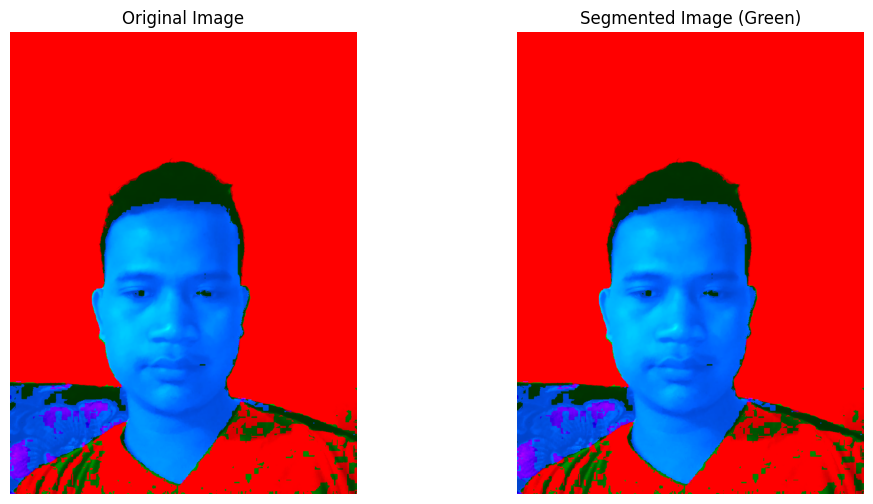

In [16]:
from PIL import Image
import numpy as np
import cv2

def load_image(image_path):
    img = Image.open(image_path)
    img = img.convert('LAB')  # Convert the image to LAB color space
    return np.array(img)

def calculate_mean_std_lab(image):
    image = segment_green(image)
    # Split the LAB image into channels
    l_channel = image[:,:,0]
    a_channel = image[:,:,1]
    b_channel = image[:,:,2]
    
    # Calculate mean and std for each channel
    mean_l = np.mean(l_channel)
    mean_a = np.mean(a_channel)
    mean_b = np.mean(b_channel)
    
    std_l = np.std(l_channel)
    std_a = np.std(a_channel)
    std_b = np.std(b_channel)
    
    return mean_l, mean_a, mean_b, std_l, std_a, std_b

def segment_green(image):
    lab_image = image
    c2 = lab_image[:, :, 1]
    low = np.array([30])
    up = np.array([126])
    mask = cv2.inRange(c2, low, up)
    img = image
    img[mask>0] = (255, 255, 255)
    
    return img

# Main function
def main():
    image_path = 'data/data_1/photo_1.jpg'  # Path to the input image
    image = load_image(image_path)
    
    mean_l, mean_a, mean_b, std_l, std_a, std_b = calculate_mean_std_lab(image)
    print("Mean L:", mean_l)
    print("Mean A:", mean_a)
    print("Mean B:", mean_b)
    print("Std L:", std_l)
    print("Std A:", std_a)
    print("Std B:", std_b)
    
    segmented_image = segment_green(image)
    
    # Display the original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_LAB2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Segmented Image (Green)')
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_LAB2RGB))
    plt.axis('off')
    plt.show()

main()
